<a href="https://colab.research.google.com/github/yashaswinimaamidikuntla/rinex-project/blob/main/rinex_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/train.csv',engine='python',encoding='ISO-8859-1')
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...,...
24827,9f19792407,"iigghhtt, just fur geet it. idc. idk. eh blah ...","immboredddd,",negative,night,70-100,Australia,25499884.0,7682300.0,3.0
24828,e38943d3e1,"No, I`m working on it all day Monday. Will tr...",smart,positive,morning,0-20,Austria,9006398.0,82400.0,109.0
24829,afe95e44cb,Doing make up for the school musical this week...,Doing make up for the school musical this week...,neutral,noon,21-30,Azerbaijan,10139177.0,82658.0,123.0
24830,1904c634f0,"Yes,it`s beautiful and i`m fortunate to live ...",beautiful,positive,night,31-45,Bahamas,393244.0,10010.0,39.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24832 entries, 0 to 24831
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            24832 non-null  object 
 1   text              24831 non-null  object 
 2   selected_text     24830 non-null  object 
 3   sentiment         24831 non-null  object 
 4   Time of Tweet     24831 non-null  object 
 5   Age of User       24831 non-null  object 
 6   Country           24831 non-null  object 
 7   Population -2020  24831 non-null  float64
 8   Land Area (Km²)   24831 non-null  float64
 9   Density (P/Km²)   24831 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.9+ MB


In [ ]:
df['sentiment'].value_counts()

neutral     9986
positive    7829
negative    7016
Name: sentiment, dtype: int64

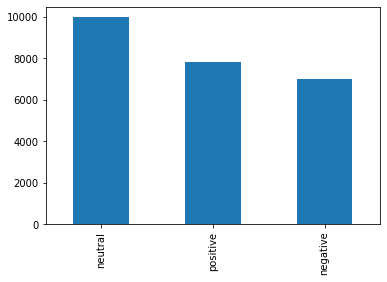

In [ ]:
df['sentiment'].value_counts().plot(kind = 'bar')

In [ ]:
x = df.iloc[0:300,1].values
x

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ' what interview! leave me alone',
       ' Sons of ****, why couldn`t they put them on the releases we already bought',
       'http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth',
       '2am feedings for the baby are fun when he is all smiles and coos',
       'Soooo high', ' Both of you',
       ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
       ' as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff',
       'I really really like the song Love Story by Taylor Swift',
       'My Sharpie is running DANGERously low on ink',
       'i want to go to music tonight but i lost my voice.',
       'test test from the LG enV2', 'Uh oh, I am sunburned',
       ' S`ok, trying to plot alternatives as we speak *sigh*',
       'i`ve been

In [ ]:
y = df.iloc[0:300,3].values
y

array(['neutral', 'negative', 'negative', 'negative', 'negative',
       'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral',
       'positive', 'negative', 'negative', 'neutral', 'negative',
       'negative', 'negative', 'negative', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'neutral', 'positive',
       'negative', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'neutral', 'neutral',
       'negative', 'neutral', 'negative', 'positive', 'neutral',
       'positive', 'neutral', 'neutral', 'positive', 'neutral',
       'negative', 'neutral', 'negative', 'negative', 'neutral',
       'neutral', 'neutral', 'negative', 'positive', 'neutral',
       'negative', 'neutral', 'negative', 'neutral', 'negative',
       'neutral', 'negative', 'positive', 'negative', 'neutral',
       'positive', 'neutral', 'positive', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'negative',
     

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0) 

In [ ]:
#Apply TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)#for training data it is vect.fit_transform
x_test_v = vect.transform(x_test)#for testing data ,it is vect.transform

In [ ]:
#Apply CLASSIFIER(SVC)
from sklearn.svm import SVC
model = SVC()

In [ ]:
#fitting the model
model.fit(x_train_v,y_train)


SVC()

In [ ]:
#Predictor variable
y_pred = model.predict(x_test_v)
y_pred # predicted values

array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'negative', 'positive', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral'], dtype=object)

In [ ]:
y_test # actual values

array(['positive', 'neutral', 'negative', 'neutral', 'positive',
       'neutral', 'neutral', 'positive', 'neutral', 'positive',
       'negative', 'negative', 'neutral', 'negative', 'neutral',
       'neutral', 'neutral', 'positive', 'positive', 'neutral',
       'positive', 'negative', 'negative', 'positive', 'neutral',
       'negative', 'negative', 'positive', 'neutral', 'positive',
       'neutral', 'positive', 'neutral', 'negative', 'neutral', 'neutral',
       'negative', 'positive', 'neutral', 'neutral', 'negative',
       'positive', 'positive', 'neutral', 'neutral', 'negative',
       'positive', 'negative', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive',
       'negative', 'negative', 'positive', 'positive', 'neutral',
       'positive', 'neutral', 'positive', 'neutral', 'positive',
       'neutral', 'neutral', 'negative', 'neutral', 'positive',
       'positive', 'negative', 'negative'], dtype=object)

In [ ]:
#Checing Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

46.666666666666664

In [ ]:
#Evaluating a specific text
a = df['text'][10]
a

' as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff'

In [ ]:
a = vect.transform([a])
model.predict(a)

array(['neutral'], dtype=object)

In [ ]:
c='so much for a day off- I`ve been on my feet, all over the place, all day!'
c

'so much for a day off- I`ve been on my feet, all over the place, all day!'

In [ ]:
c = vect.transform([c])
model.predict(c)

array(['positive'], dtype=object)

In [ ]:
d='2am feedings for the baby are fun when he is all smiles and coos'
d = vect.transform([d])
model.predict(d)

array(['positive'], dtype=object)

In [ ]:
n='2am feedings for the baby are fun when he is all smiles and coos'
n = vect.transform([n])
model.predict(n)

array(['positive'], dtype=object)

In [ ]:
#deploying the dataset , so performing the pipeling

In [ ]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
y_pred1 = text_model.predict(x_test)
y_pred1

array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'negative', 'positive', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral'], dtype=object)

In [ ]:
y_test

array(['positive', 'neutral', 'negative', 'neutral', 'positive',
       'neutral', 'neutral', 'positive', 'neutral', 'positive',
       'negative', 'negative', 'neutral', 'negative', 'neutral',
       'neutral', 'neutral', 'positive', 'positive', 'neutral',
       'positive', 'negative', 'negative', 'positive', 'neutral',
       'negative', 'negative', 'positive', 'neutral', 'positive',
       'neutral', 'positive', 'neutral', 'negative', 'neutral', 'neutral',
       'negative', 'positive', 'neutral', 'neutral', 'negative',
       'positive', 'positive', 'neutral', 'neutral', 'negative',
       'positive', 'negative', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'positive',
       'negative', 'negative', 'positive', 'positive', 'neutral',
       'positive', 'neutral', 'positive', 'neutral', 'positive',
       'neutral', 'neutral', 'negative', 'neutral', 'positive',
       'positive', 'negative', 'negative'], dtype=object)

In [ ]:
accuracy_score(y_pred1,y_test)*100

46.666666666666664

In [ ]:
a1 = df['text'][2]
print(a1)


my boss is bullying me...


In [ ]:
text_model.predict([a1])

array(['negative'], dtype=object)

In [ ]:
#Joblib 
import joblib
joblib.dump(text_model,'twitter-analysis')
#We are creating a new file called twitter-analysis,and we are dumping the pipelined model inside it

['twitter-analysis']